## K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [5]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [6]:
X.shape

(1000, 2)

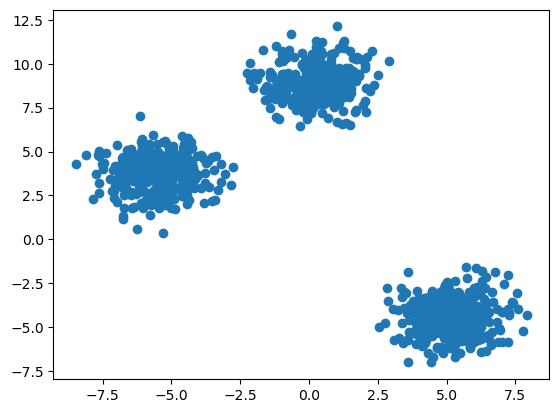

In [15]:
plt.scatter(X[:,0],X[:,1])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [7]:
from sklearn.cluster import KMeans
# Manual Way for selection of K 
# Elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    

C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

In [25]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585605,
 1140.4677884655125,
 991.8238694516631,
 854.3372198977434,
 754.5826899382744,
 663.6459348299595,
 579.9101175106059,
 533.5432854670784]

Text(0, 0.5, 'WCSS')

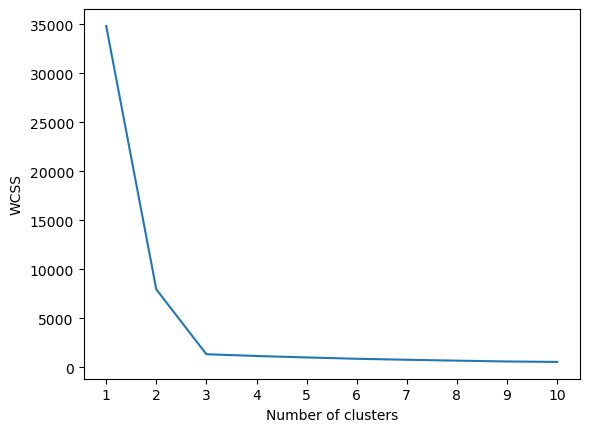

In [31]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [17]:
kmeans = KMeans(n_clusters=3,init='k-means++')
y_label = kmeans.fit_predict(X_train)

C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


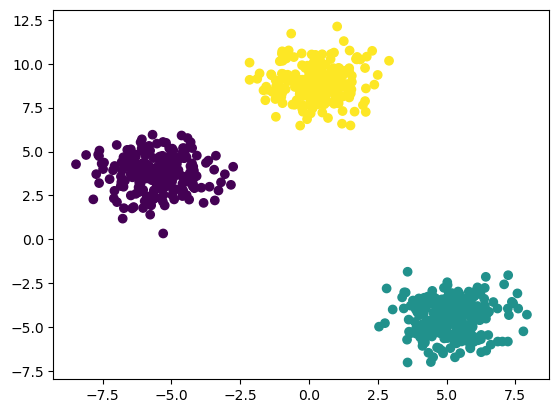

In [34]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

In [22]:
# automatic K locator -- knee locator
!pip install kneed

In [23]:
from kneed import KneeLocator

In [27]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [33]:
#performance criteria
from sklearn.metrics import silhouette_score
silhouette_coefficient = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficient.append(score)


C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

In [34]:
silhouette_coefficient

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222497,
 0.33841302976560955,
 0.3488061330821241,
 0.3470941346721781,
 0.3459272363996041,
 0.34347739065195965]

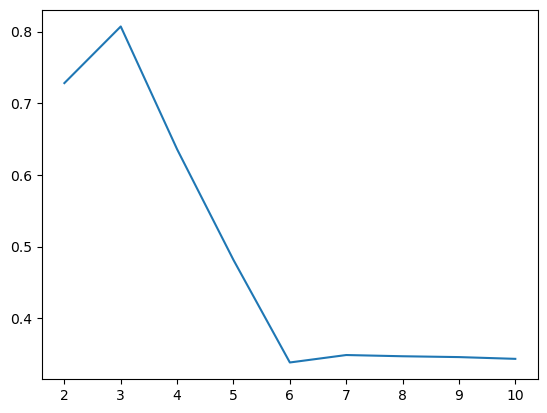

In [35]:
plt.plot(range(2,11),silhouette_coefficient);
# at 3 value of the silhouetter_coefficient is at peak, so from here we can also detect the cluster value

## Hierarchial Clustering

In [36]:
from sklearn import datasets

In [47]:
iris = datasets.load_iris()

In [48]:
iris_data = pd.DataFrame(iris.data)

In [49]:
iris_data.columns = iris.feature_names

In [50]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
#Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
X_scale = scaler.fit_transform(iris_data)

In [56]:
X_scale.shape

(150, 4)

In [59]:
# 4 features to 2 fetaures
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [61]:
pca_scaled = pca.fit_transform(X_scale)

In [63]:
pca_scaled.shape

(150, 2)

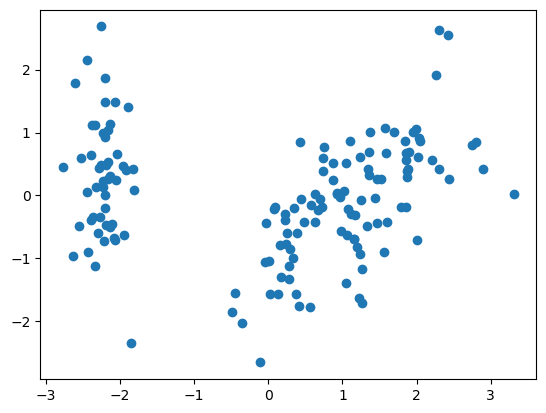

In [65]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1]);

Text(0, 0.5, 'Eucledian Distance')

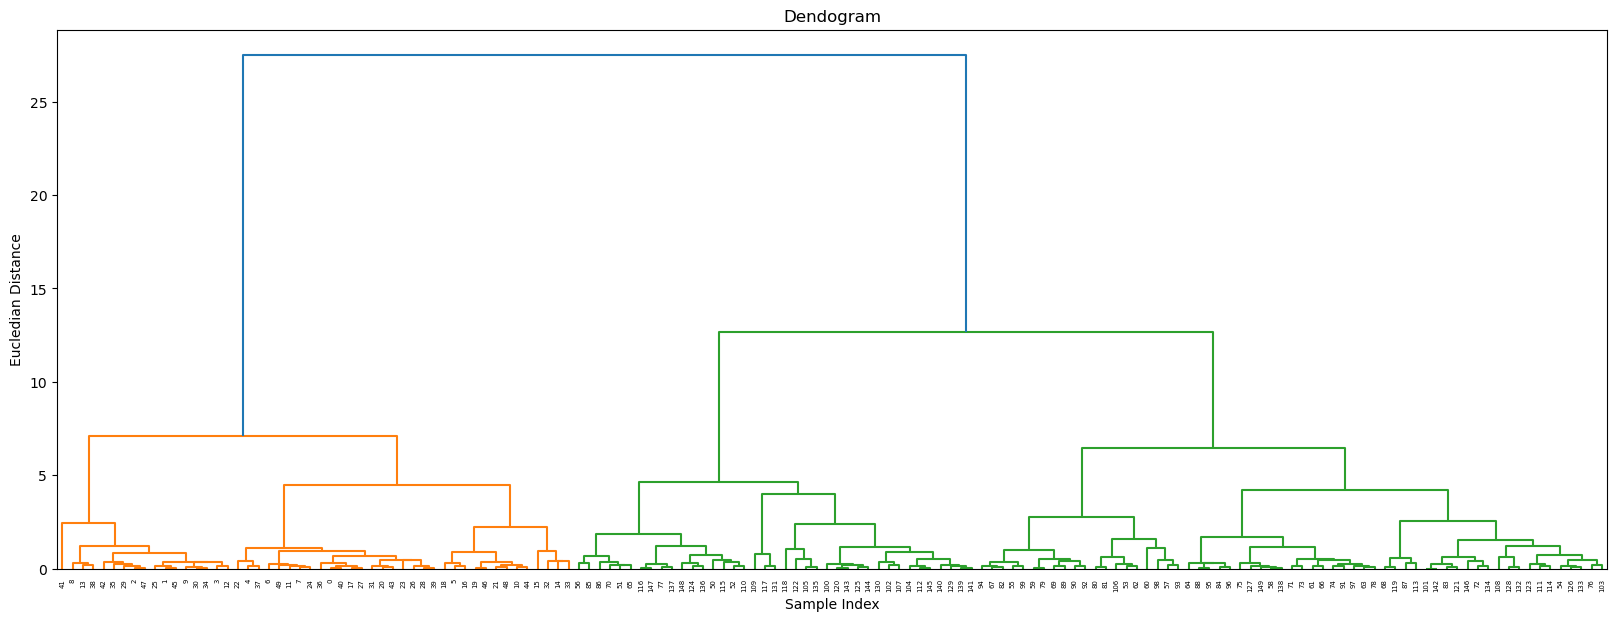

In [73]:
# Aglomerative clustering
# To construct a dendogram
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendogram")
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")
# no of clusters = 2

In [76]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)


C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [77]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

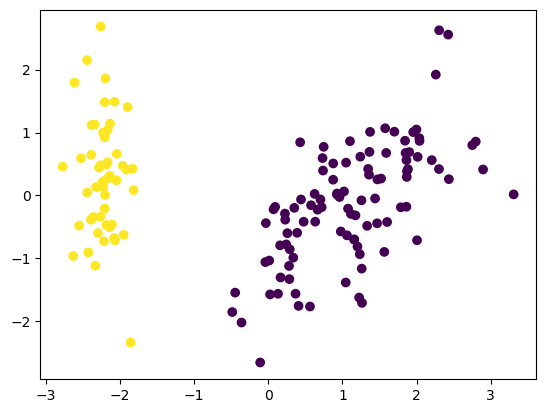

In [80]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [95]:
from sklearn.metrics import silhouette_score
silhouetter_coefficicent = []
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
    cluster.fit(pca_scaled)
    score = silhouette_score(pca_scaled,cluster.labels_)
    silhouetter_coefficicent.append(score)
    

C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\

In [96]:
silhouetter_coefficicent

[0.614520203623045,
 0.511059598876619,
 0.4487350420958893,
 0.4041689631006268,
 0.3672112889583073,
 0.3706820678912666,
 0.39305526069121116,
 0.4183694466469872,
 0.4054205628889491]

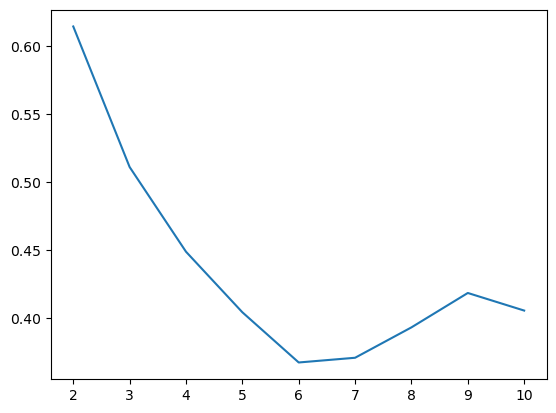

In [97]:
plt.plot(range(2,11),silhouetter_coefficicent)
plt.xticks(range(2,11));

## DBSCAN

In [100]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN # helps to cluster non linear data sets


In [115]:
X,y = make_moons(n_samples=250,noise=0.05)

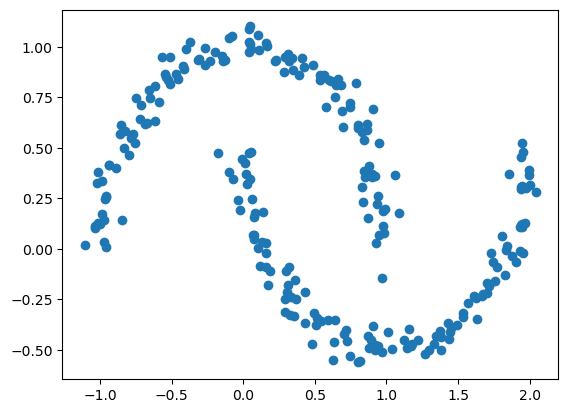

In [102]:
plt.scatter(X[:,0],X[:,1])

In [116]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [117]:
X_scaled = scaler.fit_transform(X)

In [118]:
X_scaled.shape

(250, 2)

In [119]:
dbscn = DBSCAN(eps=0.5)

In [120]:
dbscn.fit(X_scaled)

DBSCAN()

In [121]:
dbscn.labels_

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

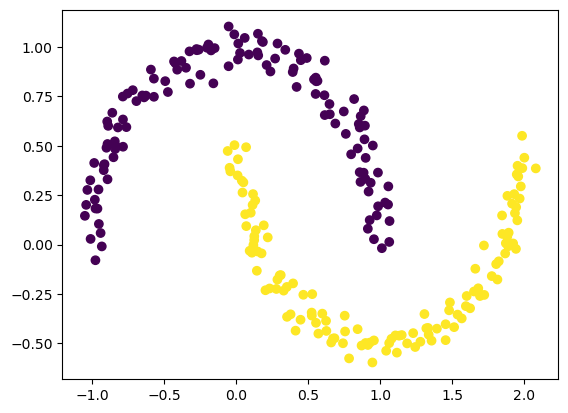

In [122]:
plt.scatter(X[:,0],X[:,1],c=dbscn.labels_);